# Introducción

El algoritmo COMPASS tiene como objetivo predecir el grado de posibilidad de reincidencia de un criminal, para ello ha sido entrenado con datos pertenecientes a una gran variedad de delincuentes. Debido a la diversidad de características demográficas y personales de los sujetos de estudios, en ocasiones pueden aparecer patrones que influencian al algoritmo a emitir predicciones sesgadas en base a estos rasgos.

En esta práctica se estudiará un dataframe con información de criminales pertenecientes a distintas razas, géneros y categorías de edad, el objetivo es evaluar la influencia de los diversos factores que entran en juego en la predicción de riesgo emitida por el algoritmo, empleando la técnica de interpretabilidad SHAP.

# Carga y Preprocesamiento de Datos

En este punto se realizará la carga de la información que será utilizada para entrenar el modelo predictivo, además se aplicarán una serie de técnicas de limpieza y preprocesamiento para que el conjunto de datos cuente con la mayor calidad posible previa a su uso por el modelo.

## Ingesta

En primer lugar se lleva a cabo la ingesta del conjunto de datos de partida, para realizar la ingesta se descarga el dataset de un repositorio de google drive mediante un enlace público, una vez instalado en el entorno del notebook se carga todo su contenido en una estructura de información de tipo dataframe, consistente en una matriz de datos, mediante la librería Pandas.

Además se descargán todas las librerías necesarias para el desarrollo de los próximos pasos del notebook, de este modo ya se tendrán listas todas las herramientas que el entorno de ejecución pueda necesitar para llevar a cabo el estudio.

In [ ]:
# Se importan las librerías necesarias para el entorno de ejecución
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Se descarga el conjunto de datos
!wget "https://drive.google.com/uc?export=download&id=1_9mqDyntAu0FK11d4R37kwI4Dfl8YS-7" -O 'dataset.csv'

# Mediante la librería pandas se construye un dataframe a partir del dataset descargado
dataframe = pd.read_csv('dataset.csv')

print(dataframe)

--2024-07-21 12:17:08--  https://drive.google.com/uc?export=download&id=1_9mqDyntAu0FK11d4R37kwI4Dfl8YS-7
Resolving drive.google.com (drive.google.com)... 74.125.202.102, 74.125.202.101, 74.125.202.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1_9mqDyntAu0FK11d4R37kwI4Dfl8YS-7&export=download [following]
--2024-07-21 12:17:08--  https://drive.usercontent.google.com/download?id=1_9mqDyntAu0FK11d4R37kwI4Dfl8YS-7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4631672 (4.4M) [application/octet-stream]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   4.42M  --.-KB/s   

## Exploración Inicial de Datos

El análisis exploratorio de datos (EDA) es la etapa dedicada a conocer la naturaleza de los datos con los que se va a trabajar, para ello se utilizará el módulo EDAModule desarrollado por mí mismo y accesible a través del enlace de GitHub que se muestra en el código, a partir de este módulo se impartará la clase ExploratoryDataAnalysis con todas las funcionalidades necesarias para llevar a cabo el estudio de la estructura y distribución de la información.

En este caso, no se llevará a cabo un análisis profundo como tal, puesto que en la anterior práctica de la asignatura ya se estudiaron las características que integraban el dataset, por lo tanto no se repetirán dichos puntos. Además, el foco de esta práctica se encuentra en el entrenamiento de un modelo y la aplicación de técnicas de interpretabilidad al mismo. Sin embargo, es necesario repasar algunos aspectos del conjunto de información para aplicar un correcto proceso de preprocesamiento.

In [ ]:
# Se importa el módulo con todas las funciones auxiliares
!rm -r ExploratoryDataAnalysis/

!git clone https://github.com/jj-tena/ExploratoryDataAnalysis.git

!mv ExploratoryDataAnalysis/EDAModule.py ExploratoryDataAnalysis/../EDAModule.py

!rm -r ExploratoryDataAnalysis/

from EDAModule import ExploratoryDataAnalysis

# Se inicializa el módulo mediante el dataframe
eda = ExploratoryDataAnalysis(dataset=dataframe)

rm: cannot remove 'ExploratoryDataAnalysis/': No such file or directory
Cloning into 'ExploratoryDataAnalysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 15 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 4.85 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (2/2), done.


## Dimensiones

La estructura dataframe consiste en una matriz de datos en la que las columnas son las variables a estudiar y las filas son las muestras de datos. En este caso se tiene un dataframe con unas dimensiones de 40 variables de estudio y 18316 entradas, lo cual nos da un resultado de 732640 datos.

In [ ]:
# Se ejecuta la función getShape para obtener las dimensiones del dataframe
print("Shape: ", eda.getShape())

# Se ejecuta la función getSize para obtener el tamaño del dataframe
print("\nSize:", eda.getSize())

Shape:  (18316, 40)

Size: 732640


## Variables

A continuación se expone el listado de variables del dataframe junto a una explicación de las mismas:

* id: identificador único para cada entrada en el dataset.
* name: nombre completo del acusado.
* first: nombre del acusado.
* last: apellido del acusado.
* sex: sexo del acusado (Male/Female).
* dob: fecha de nacimiento del acusado.
* age: edad del acusado.
* age_cat: categoría de edad del acusado (Less than 25, 25 - 45, Greater than 45).
* race: raza del acusado (African-American, Asian, Caucasian, Hispanic, Native American, Other).
* juv_fel_count: número de delitos juveniles graves cometidos por el acusado.
* decile_score: puntuación de riesgo de reincidencia (1-10) asignada por COMPAS.
* juv_misd_count: número de delitos juveniles menores cometidos por el acusado.
* juv_other_count: número de otros delitos juveniles cometidos por el acusado.
* priors_count: número de delitos anteriores cometidos por el acusado.
* days_b_screening_arrest: número de días entre el arresto y la evaluación COMPAS.
* c_jail_in: fecha y hora de ingreso a la cárcel para el caso actual.
* c_jail_out: fecha y hora de salida de la cárcel para el caso actual.
* c_days_from_compas: días desde la evaluación COMPAS hasta la fecha del cargo.
* c_charge_degree: grado de la acusación actual (Misdemeanor, Felony, ...).
* c_charge_desc: descripción de la acusación actual.
* is_recid: indicador de si el acusado reincidió (1) o no (0) después de la evaluación COMPAS.
* r_charge_degree: grado de la acusación de reincidencia.
* r_days_from_arrest: número de días desde el arresto hasta la reincidencia.
* r_offense_date: fecha del delito de reincidencia.
* r_charge_desc: descripción del cargo de reincidencia.
* r_jail_in: fecha y hora de ingreso a la cárcel para el caso de reincidencia.
* violent_recid: indicador de si el acusado reincidió violentamente (1) o no (0).
* is_violent_recid: indicador de si el acusado reincidió violentamente (1) o no (0) después de la evaluación COMPAS.
* vr_charge_degree: grado del cargo de reincidencia violenta.
* vr_offense_date: fecha del delito de reincidencia violenta.
* vr_charge_desc: descripción del cargo de reincidencia violenta.
* type_of_assessment: tipo de evaluación (Risk of Recidivism, Risk of Violence, ...).
* decile_score: puntuación de riesgo de reincidencia (1-10) asignada por COMPAS (puede ser redundante con la columna anterior).
* score_text: texto de la puntuación de riesgo (Low, Medium, High).
screening_date: fecha de la evaluación COMPAS.
* v_type_of_assessment: tipo de evaluación de violencia.
* v_decile_score: puntuación de riesgo de violencia (1-10) asignada por COMPAS.
* v_score_text: texto de la puntuación de riesgo de violencia (Low, Medium, High).
* priors_count: número de delitos anteriores (puede ser redundante con la columna anterior).
* event: indicador del evento de reincidencia (1 si ocurrió reincidencia, 0 si no ocurrió).

In [ ]:
# Se ejecuta la función getColumns para obtener el listado de columnas del dataframe
print("Columns:", eda.getColumns())

Columns: Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'violent_recid', 'is_violent_recid',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'priors_count.1', 'event'],
      dtype='object')


## Únicos

En este punto se observa el número de valores distintos que almacena cada variable y cuantas apariciones hay de cada uno de estos valores en la columna.

El aspecto más importanto de este punto es estudiar los distintos valores que presenta la variable objetivo "is_recid", en principio esta columna solo debería admitir los valores 1 y 0 en función de si el sujeto volvió a reincidir o no lo hizo. Sin embargo en la lista de valores únicos se puede apreciar que almacena 3 valores distintos, en el conteo de estos valores se observa que presenta 820 muestras con valor -1, esto puede deberse a un error de almacenamiento o que represente algún tipo de caso especial.

In [ ]:
# Se ejecuta la función getUniques para mostrar los valores únicos de cada variable del dataframe
print("List of Unique Values:")
print(eda.getUniques())

# Se ejecuta la función countUniques para mostrar el número de valores únicos de cada variable del dataframe
print("\nCount of Unique Values:", eda.countUniques())

List of Unique Values:
id                         11001
name                       10855
first                       3876
last                        5635
sex                            2
dob                         7485
age                           65
age_cat                        3
race                           6
juv_fel_count                 12
decile_score                  11
juv_misd_count                11
juv_other_count               12
priors_count                  39
days_b_screening_arrest      534
c_jail_in                   9806
c_jail_out                  8714
c_days_from_compas           657
c_charge_degree               14
c_charge_desc                513
is_recid                       3
r_charge_degree               10
r_days_from_arrest           201
r_offense_date              1075
r_charge_desc                341
r_jail_in                    972
violent_recid                  0
is_violent_recid               2
vr_charge_degree               9
vr_offense_date     

## Limpieza de datos

Es necesario eliminar todas las muestras de datos en las que la variable objetivo tome como valor -1 para que los datos puedan ser procesados por un algoritmo de entrenamiento de clasificación binaria.

Además se deben eliminar la variable r_offense_date, r_charge_desc y r_jail_in puesto que,como se observó en el estudio de valores únicos, prácticamente cada sujeto tiene un valor distinto para estas características, lo cual puede hacer que el modelo lo entienda como un identificador y sufra overfitting.

A continuación se mostrará el número de muestras original y el número de muestras tras eliminar las variables explicadas en el punto anterior.

In [ ]:
# Mostrar el número original de filas
original_row_count = dataframe.shape[0]
print("Número original de filas en el dataframe:", original_row_count)

# Filtrar datos para eliminar valores -1 en 'is_recid'
dataframe = dataframe[dataframe['is_recid'] != -1]

# Eliminar la variable 'r_offense_date'
dataframe = dataframe.drop(columns=['r_offense_date', 'r_charge_desc', 'r_jail_in'])

# Mostrar el número de filas después del filtrado
filtered_row_count = dataframe.shape[0]
print("Número de filas en el dataframe después de eliminar valores -1 en 'is_recid':", filtered_row_count)

Número original de filas en el dataframe: 18316
Número de filas en el dataframe después de eliminar valores -1 en 'is_recid': 17496


## Identificación de valores nulos

Los valores nulos son datos faltantes en cualquier fila o columna, la ausencia de datos puede suponer un problema en los algoritmos de IA y análisis de ciencia de datos a la hora de comprender las distribuciones de las variables, por tanto es necesario evaluar en este punto la presencia de valores nulos en el conjunto de datos.

Como se puede apreciar respecto a las 18316 entradas de datos:
* Las variables days_b_screening_arrest, c_jail_in, c_jail_out, c_days_from_compas, c_charge_degree y c_charge_desc tiene una presencia considerable de valores faltantes.
* A las columnas r_charge_degree, r_days_from_arrest, r_offense_date , r_charge_desc y r_jail_in les faltan más de la mitad de sus valores.
* Las variables violent_recid, vr_charge_degree, vr_offense_date y vr_charge_desc directamente tienen casi todos sus valores como nulos, resultando por lo tanto inservibles para cualquier proceso de ciencia de datos.

In [ ]:
# Se ejecuta la función getNulls para obtener el número de valores nulos de cada columna del dataframe
print("Checking for Missing Values:")
eda.getNulls()

Checking for Missing Values:


id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date              9899
r_charge_desc              10039
r_jail_in                  11957
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            16977
vr_charge_

## Manejo de valores nulos

A raíz de lo visto en el punto anterior, se puede afirmar que existe un gran número de columnas que presentan un gran número de valores nulos, incluso con la variable 'violent_recid' teniendo todos sus valores nulos, por lo que si se siguiese una estrategia en la que se eliminasen todas las filas que presentan este tipo de valores dejaríamos el dataset sin ninguna muestra.

Es necesario aplicar una técnica de imputación de valores nulos que no elimine dichas muestras, en este caso la idea ha sido sustituir el valor nulo de cada variable numérica por su mediana y para cada variable categórica por su valor más común. Pero para que esta estrategia pueda funcionar es necesario eliminar la variable 'violent_recid', debido a que al no tener valores no se podría aplicar ninguna de las técnicas mencionadas.

In [ ]:
from sklearn.impute import SimpleImputer

# Eliminar la columna 'violent_recid'
if 'violent_recid' in dataframe.columns:
    dataframe.drop('violent_recid', axis=1, inplace=True)

# Mostrar el número original de filas
original_row_count = dataframe.shape[0]
print("Número original de filas en el dataframe:", original_row_count)

# Contar el número de filas que contienen al menos un valor nulo
null_count_before = dataframe.isnull().any(axis=1).sum()
print("Número de filas con al menos un valor nulo antes de la imputación:", null_count_before)

# Imputar columnas numéricas con la media
num_imputer = SimpleImputer(strategy='median')
num_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
dataframe[num_columns] = pd.DataFrame(num_imputer.fit_transform(dataframe[num_columns]), columns=num_columns, index=dataframe.index)

# Imputar columnas categóricas con el modo
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_columns = dataframe.select_dtypes(include=['object']).columns
dataframe[cat_columns] = pd.DataFrame(cat_imputer.fit_transform(dataframe[cat_columns]), columns=cat_columns, index=dataframe.index)

# Mostrar el número de filas que contienen al menos un valor nulo después de la imputación
null_count_after = dataframe.isnull().any(axis=1).sum()
print("Número de filas con al menos un valor nulo después de la imputación:", null_count_after)

# Mostrar el número de filas después de la imputación
row_count_after_imputation = dataframe.shape[0]
print("Número de filas después de la imputación:", row_count_after_imputation)


Número original de filas en el dataframe: 17496
Número de filas con al menos un valor nulo antes de la imputación: 16855
Número de filas con al menos un valor nulo después de la imputación: 0
Número de filas después de la imputación: 17496


## Tipos de variables

El dataframe presenta tanto columnas numéricas como columnas categóricas, siendo la división entre estas:

* Numéricas: 'id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_days_from_compas', 'is_recid', 'r_days_from_arrest', 'is_violent_recid', 'decile_score.1', 'v_decile_score', 'priors_count.1', 'event'

* Categóricas: 'name', 'first', 'last', 'sex', 'dob', 'age_cat', 'race', 'c_jail_in', 'c_jail_out', 'c_charge_degree', 'c_charge_desc', 'r_charge_degree', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_score_text'

Lo más importante de este apartado es verificar cuales son los tipos que aparecen en el dataframe para aplicarles las correspondientes transformaciones de los siguientes puntos, en este caso las variables numéricas son de tipo int64 y float64, mientras que todas las categóricas son de tipo object.

In [ ]:
# Se ejecuta la función getTypes para obtener el tipo de cada variable del dataframe
print("Data Types:")
eda.getTypes()

Data Types:


id                         float64
name                        object
first                       object
last                        object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in                   object
violent_recid              float64
is_violent_recid             int64
vr_charge_degree    

## Estandarización de variables numéricas

La estandarización de variables numéricas tiene como objetivo transformar las variables numéricas para que tengan una media de cero y una desviación estándar de uno. Esto significa que los valores de las variables transformadas estarán centrados alrededor de cero y tendrán una dispersión similar, lo que facilita la comparación y el análisis de las variables.

Para llevar a cabo este proceso se utilizará el algoritmo StandardScaler que implementa la estandarización escalando las características de tal manera que tengan una media de cero y una desviación estándar de uno.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Obtener las columnas numéricas excluyendo 'is_recid'
num_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns.drop(['is_recid'])

# Definir el escalador para las columnas numéricas
num_scaler = StandardScaler()

# Aplicar el escalado solo a las columnas numéricas
dataframe[num_cols] = num_scaler.fit_transform(dataframe[num_cols])

# Mostrar el DataFrame con las variables numéricas estandarizadas
print(dataframe.head())

         id              name   first       last   sex         dob       age  \
0 -2.228857  miguel hernandez  miguel  hernandez  Male  18/04/1947  3.020946   
1 -2.228452  miguel hernandez  miguel  hernandez  Male  18/04/1947  3.020946   
3 -2.227642       kevon dixon   kevon      dixon  Male  22/01/1982  0.004271   
4 -2.227236          ed philo      ed      philo  Male  14/05/1991 -0.857636   
5 -2.226831          ed philo      ed      philo  Male  14/05/1991 -0.857636   

           age_cat              race  juv_fel_count  ...  \
0  Greater than 45             Other      -0.169526  ...   
1  Greater than 45             Other      -0.169526  ...   
3          25 - 45  African-American      -0.169526  ...   
4     Less than 25  African-American      -0.169526  ...   
5     Less than 25  African-American      -0.169526  ...   

                vr_charge_desc  type_of_assessment  decile_score.1  \
0                      Battery  Risk of Recidivism       -1.375997   
1                 

## Codificación de variables categóricas

La codificación de variables categóricas es un proceso que se utiliza para convertir variables categóricas en una forma numérica que los algoritmos de aprendizaje automático pueden entender y utilizar de manera efectiva.

En este apartado se empleará el algoritmo OrdinalEncoder que convierte las características categóricas en números enteros, asignando a cada categoría un valor único en función de un orden específico.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Obtener las columnas categóricas
cat_cols = dataframe.select_dtypes(include=['object']).columns

# Definir el codificador para las columnas categóricas
cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Aplicar la codificación solo a las columnas categóricas
dataframe[cat_cols] = cat_encoder.fit_transform(dataframe[cat_cols])

# Mostrar el DataFrame con las variables categóricas codificadas
print(dataframe.head())

         id    name   first    last  sex     dob       age  age_cat  race  \
0 -2.228857  7047.0  2375.0  2252.0  1.0  4109.0  3.020946      1.0   5.0   
1 -2.228452  7047.0  2375.0  2252.0  1.0  4109.0  3.020946      1.0   5.0   
3 -2.227642  5737.0  1893.0  1379.0  1.0  4996.0  0.004271      0.0   0.0   
4 -2.227236  2882.0   986.0  3862.0  1.0  3190.0 -0.857636      2.0   0.0   
5 -2.226831  2882.0   986.0  3862.0  1.0  3190.0 -0.857636      2.0   0.0   

   juv_fel_count  ...  vr_charge_desc  type_of_assessment  decile_score.1  \
0      -0.169526  ...            35.0                 0.0       -1.375997   
1      -0.169526  ...            35.0                 0.0       -1.375997   
3      -0.169526  ...            54.0                 0.0       -0.694156   
4      -0.169526  ...            35.0                 0.0       -0.353236   
5      -0.169526  ...            35.0                 0.0       -0.353236   

   score_text  screening_date  v_type_of_assessment  v_decile_score  \
0  

## Detección de valores atípicos

Los gráficos boxplots permiten apreciar la distribución de valores de las variables, en este punto se emplearán para identificar aquellas variables que presenten valores muy alejados del grueso de su distribución, estos valores extremadamente alejados de la media se denominan outliers. Las variables que pueden llegar a presentar posibles outliers son:

* age: puede ser debido a un crimen cometido por alguien de edad extremadamente avanzada
* juv_fel_count, juv_misd_count, juv_other_count y priors_count: es posible que se deba a psicopatías o graves desórdenes mentales
* days_b_screening_arrest y c_days_from_compass: puede encontrar una explicación debido a largos procesos judiciales
* r_days_from_arrest: un valor extremo en esta variable solo significa que la persona se ha mantenido un tiempo considerable reinsertada en la sociedad

Es importante visualizar este tipo de información, puesto que advierte de la necesidad de aplicar técnicas de detección y eliminación de outliers en el próximo punto.

10. Boxplot visualization


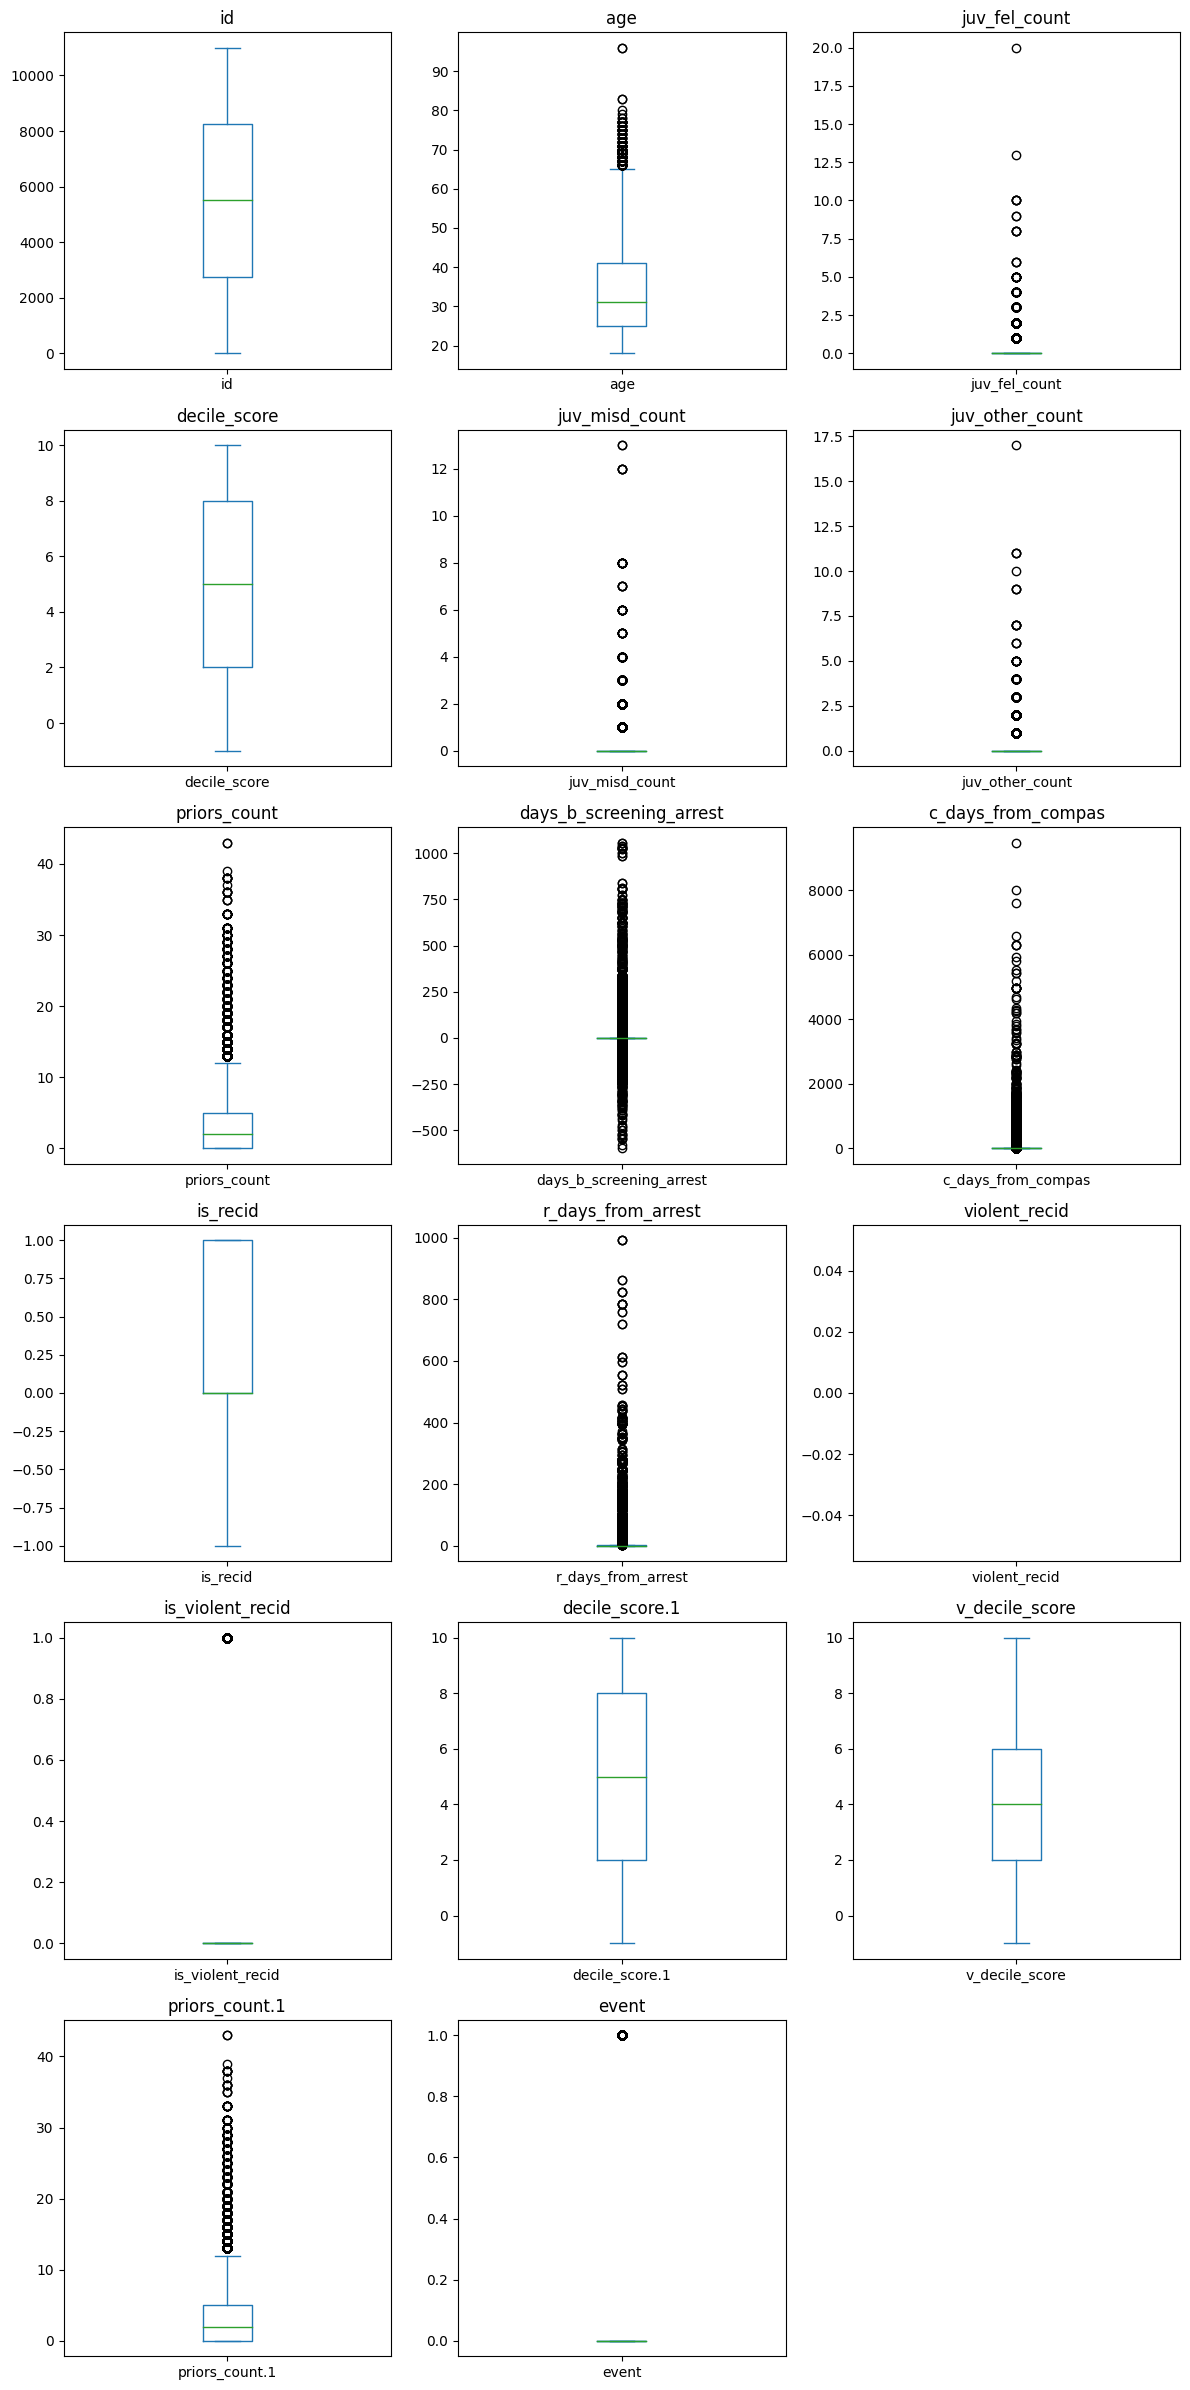

In [ ]:
# Se ejecuta la función getBoxplots para mostrar un gráfico boxplot de cada variable del dataframe
print("10. Boxplot visualization")
eda.getBoxplots()

## Eliminación de valores atípicos

Para finalizar el proceso de limpieza de la información solo resta realizar la detección y eliminación de valores atípicos puesto que pueden llegar a distorsionar los resultados del análisis y afectar negativamente el rendimiento de los modelos de aprendizaje automático.

Se utilizarán dos algoritmos de este tipo para la detección de outliers, los cuales buscarán posibles datos anómalos sin la necesidad del entrenamiento con muestras etiquetadas, los algoritmos que se utilizarán son:

* Local Outlier Factor (LOF): se basa en la idea de que los valores atípicos tienen una densidad local significativamente menor que la de sus vecinos. LOF calcula un factor de atipicidad para cada instancia en función de la densidad local de sus vecinos, si un punto tiene un factor LOF alto, significa que está menos densamente rodeado que la mayoría de los puntos. Los valores atípicos se identifican como aquellos puntos con un factor LOF significativamente mayor que 1.

* Isolation Forest: se basa en el uso de árboles de decisión, se diferencia del método anterior en que no asume que los datos atípicos están necesariamente en áreas de baja densidad. El algoritmo funciona construyendo múltiples árboles de decisión de manera aleatoria, cada árbol divide recursivamente el espacio de características en subconjuntos, seleccionando al azar una característica y un valor de división para cada división. Los valores atípicos se identifican más rápidamente en el proceso de construcción del árbol, ya que necesitan menos divisiones para ser aislados. La puntuación de anomalía se calcula basándose en el promedio de la profundidad de los nodos donde se encuentran los datos, los valores atípicos tendrán puntuaciones de anomalía más bajas.

Después de ejecutar ambos algoritmos, se registra el número de valores atípicos detectados por cada uno y se procede a eliminar aquellos detectados por ambos.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import numpy as np

# Crear el modelo de Local Outlier Factor (LOF)
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Crear el modelo de Isolation Forest (IF)
clf_if = IsolationForest(random_state=0)

# Ajustar el modelo LOF a los datos
outliers_lof = clf_lof.fit_predict(dataframe)

# Identificar valores atípicos con LOF
outliers_indices_lof = np.where(outliers_lof == -1)[0]  # Usamos [0] para obtener el array directamente

# Ajustar el modelo IF a los datos
outliers_if = clf_if.fit_predict(dataframe)

# Identificar valores atípicos con IF
outliers_indices_if = np.where(outliers_if == -1)[0]  # Usamos [0] para obtener el array directamente

# Encontrar valores atípicos en común
common_outliers = np.intersect1d(outliers_indices_lof, outliers_indices_if)

# Imprimir resultados
print("Número de valores atípicos detectados por LOF:", len(outliers_indices_lof))
print("Número de valores atípicos detectados por IF:", len(outliers_indices_if))

if len(common_outliers) > 0:
    print("Número de valores atípicos en común:", len(common_outliers))
    # Eliminar valores atípicos en común del conjunto de datos original
    print("Número de entradas en el dataframe original antes de eliminar valores atípicos en común:", dataframe.shape[0])
    dataframe = dataframe.drop(index=dataframe.index[common_outliers])
    print("Número de entradas en el dataframe original después de eliminar valores atípicos en común:", dataframe.shape[0])
else:
    print("\nNo hay valores atípicos en común entre LOF y IF.")

Número de valores atípicos detectados por LOF: 1750
Número de valores atípicos detectados por IF: 1741
Número de valores atípicos en común: 216
Número de entradas en el dataframe original antes de eliminar valores atípicos en común: 17496
Número de entradas en el dataframe original después de eliminar valores atípicos en común: 17280


# División del Dataset

Es necesario realizar la división del dataset en un conjunto de entrenamiento y prueba para que el modelo prueba entrenarse con el primer conjunto y ser evaluado empleando el segundo sin que tenga conocimiento previo de el y por tanto no pueda influenciar de modo alguno en sus predicciones.

Para realizar la división se utilizará la función train_test_split de la biblioteca Scikit-learn, que permite separar las variables predictoras de la variable objetivo is_recid. La división se realiza con una proporción del 70% para el conjunto de entrenamiento y el 30% para el conjunto de prueba, garantizando así que la mayoría de los datos se utilicen para entrenar el modelo, mientras que otra muestra separada de menor tamaño se reserva para evaluar su rendimiento.

Además, se ha tenido en cuenta que la división respete la estratificación de la variable race, asegurando que la proporción de las distintas razas se mantenga constante tanto en el conjunto de entrenamiento como en el conjunto de prueba. Mediante este matiz es posible evitar sesgos en la distribución de las categorías de raza entre los conjuntos, lo cual podría afectar de forma negatica a la capacidad de generalización del modelo.

Finalmente, se establece un random_state para asegurar la reproducibilidad de la división, permitiendo que los resultados sean consistentes en cada ejecución del código.

El tamaño de los conjuntos de entrenamiento y prueba se imprime al final para evidenciar que la partición de los datos se efectúa de manera correcta.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataframe.drop(columns=['is_recid'])  # Excluir la variable objetivo 'is_recid'
y = dataframe['is_recid']  # Variable objetivo 'is_recid'

# Dividir el dataset en conjunto de entrenamiento y prueba con estratificación por 'race'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=dataframe['race'], random_state=42)

# Imprimir tamaños de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 12096 muestras
Tamaño del conjunto de prueba: 5184 muestras


# Entrenamiento del Modelo

XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático que puede ser utilizado en problemas de clasificación, para resolverlos implementa la técnica de boosting, la cual combina de manera secuencial múltiples árboles de decisión para formar un modelo con mayor robustez, cada árbol sucesivo intenta corregir los errores cometidos por los anteriores, mejorando sucesivamente su desempeño.

Se empleará esta técnica para entrenar un modelo a partir del conjunto de de datos de entrenamiento, y se utilizará el conjunto de prueba para evaluar su desempeño mediante las siguientes métricas:

* Precision: proporción de predicciones positivas correctas entre todas las predicciones positivas.
* Recall: proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias positivas reales.
* F1-Score: media entre precision y la recall.
* Confusion Matrix: muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

Precisión del modelo: 0.96


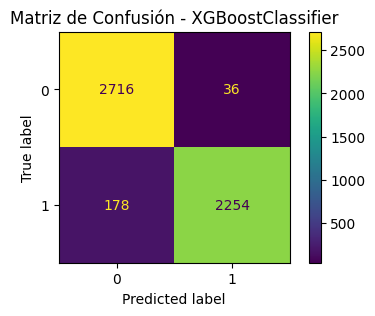

Puntuación F1 (Weighted): 0.9586
Precisión (Weighted): 0.9600
Recall (Weighted): 0.9587


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear un clasificador XGBoost
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión - XGBoostClassifier")
plt.gcf().set_size_inches(5, 3)  # Ajustar el tamaño de la gráfica a 5x3 pulgadas
plt.show()

# Calcular e imprimir métricas adicionales
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Puntuación F1 (Weighted): {f1:.4f}")
print(f"Precisión (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")

# Generar SHAP values

SHAP (SHapley Additive exPlanations) es una técnica de interpretabilidad que facilita el entendimiento de la salida de cualquier modelo de machine learning, proporciona una medida de la importancia de las variables predictivas, asignando a cada característica un valor que representa su contribución a la predicción del modelo.

En este punto se empleará SHAP para obtener los valores de SHAP(SHAP values) asociados al modelo entrenado en el punto anterior, estos valores son el resultado esta técnica y pueden ser interpretados como el impacto de la presencia de una característica en comparación con su ausencia.

Concretamente los SHAP values consisten en un array bidimensional:
* Primera dimensión (5184): cada entrada representa una instancia en el conjunto de prueba.
* Segunda dimensión (35): cada entrada representa una característica (predictores) del conjunto de datos.

In [ ]:
!pip install shap

In [ ]:
import shap

# Inicializar el explainer de SHAP
explainer = shap.TreeExplainer(model)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Verificar las dimensiones de shap_values
print("Dimensiones de shap_values:", shap_values.shape)

Dimensiones de shap_values: (5184, 35)


# Análisis con SHAP

Una vez se han obtenido los shap values fruto de aplicar la técnica de explicabilidad SHAP al modelo entrenado, el siguiente paso es realizar un estudio de la información derivada de los mismos, para ello el análisis se apoyará en diversas herramientas gráficas.

## Interpretación de la Importancia Global de los Predictores

Lo primero que se debe realizar en este análisis es el estudio del impacto que tiene cada una de las características predictoras en el modelo a la hora de emitir su predicción respecto a la variable objetiva.

Para llevar a cabo este objetivo se utilizará la técnica summary plot de SHAP, la cual genera una gráfica que muestra el efecto de cada variable del conjunto de predictores:
* Eje y: muestra las características, ordenadas por el peso de su influencia en las predicciones.
* Eje x: refleja el peso de cada característica en la salida del modelo.

En base a la gráfica generada se pueden realizar las siguientes reflexiones:
* La característica con mayor peso en el modelo con una inmensa diferencia es r_charge_degree, tiene todo el sentido que en función del cargo del delito cometido, la persona tenga una mayor falicidad para volver a reincidir.
* El resto de variables tiene una influencia bastante baja y muy similar entre sí sin grandes saltos, después de la primera variable vienen r_days_from_arrest (influye la capacidad de aguantar sin volver a comenter delitos), is_violent_recid (hay un peso en si uso violencia al reincidir) y priors_count (la cantidad de delitos cometidos previamiente tiene impacto).
* En quinta posición aparece age, que podría valorarse como una variable sensible de sufrir sesgos por tener un carácter biológico y personal.
* Destaca que las variables sensibles de sufrir sesgos como la edad, el género y la raza ocupan puestos bastante bajos, por lo cual no tienen mucho impacto en la decisión que toma el modelo y por tanto se puede rechazar la idea de que el modelo sufra grandes sesgos.

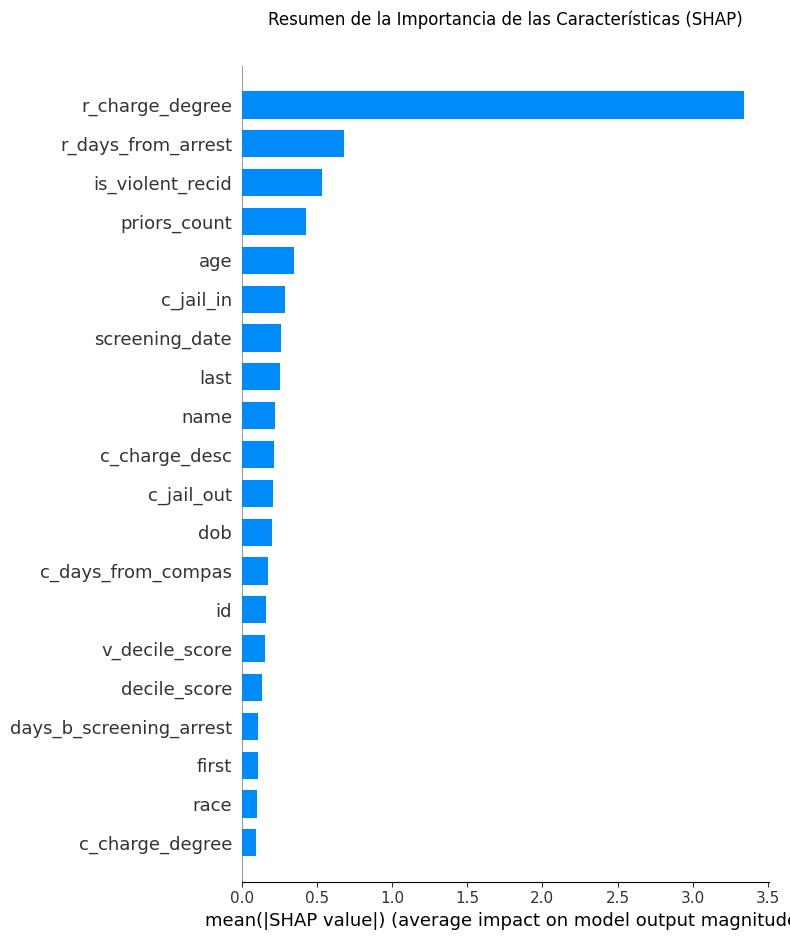

In [ ]:
import shap
import matplotlib.pyplot as plt

# Inicializar SHAP
shap.initjs()

# Crear el gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)

# Ajustar la visualización
plt.title('Resumen de la Importancia de las Características (SHAP)', pad=30)
plt.tight_layout()
plt.show()

## Influencia de Características en Predicciones Individuales


El waterfall plot de SHAP es una técnica que permite generar una gráfica para visualizar cómo la predicción de un modelo se descompone en contribuciones de características individuales y facilita el entendimiento de cómo cada característica afecta la predicción final para una instancia específica.

Este gráfico está compuesto por una serie de barras, en el que cada una representa la contribución de una característica a la predicción de la instancia, las barras que se extienden hacia la derecha aumentan la predicción, mientras que las que se extienden hacia la izquierda la disminuyen.

El color indica la magnitud del valor de la característica (por ejemplo, rojo para valores altos y azul para valores bajos), la longitud de la barra indica la magnitud de la contribución de la característica a la predicción final y las características se ordenan según su contribución, mostrando primero las más influyentes.

En este punto se seleccionarán 4 individuos, cada uno perteneciente a una raza distinta, una vez se haya establecido el conjunto de sujetos de prueba, para cada uno de ellos se generará un waterfall plot con el objetivo de ver como difiere la influencia de las demás características en función de la raza seleccionada.

A la vista de las gráficas waterfall generadas se observa que la variables r_charge_degree es la que más impacto tiene en la predicción del modelo, mientras que el resto de características no poseen tanta importancia, además para las razas seleccionadas se puede afirmar lo siguiente:

* Las razas 0 (otras razas) y 5 (nativo americanos) han obtenido unos resultados similares, teniendo las variables r_charge_degree y priors_count un gran impacto negativo, además la primera cuenta con más del doble del peso de la segunda.

* Las razas 3 (hispanos) y 2 (afroamericanos) han obtenido unos resultados parecidos, en este caso para ambas la variable r_charge_degree tiene un impacto positivo muy alto.

Razas únicas en el conjunto de prueba: [0. 2. 3. 5. 1. 4.]
Waterfall plot para instancia 2181 de raza 2.0:


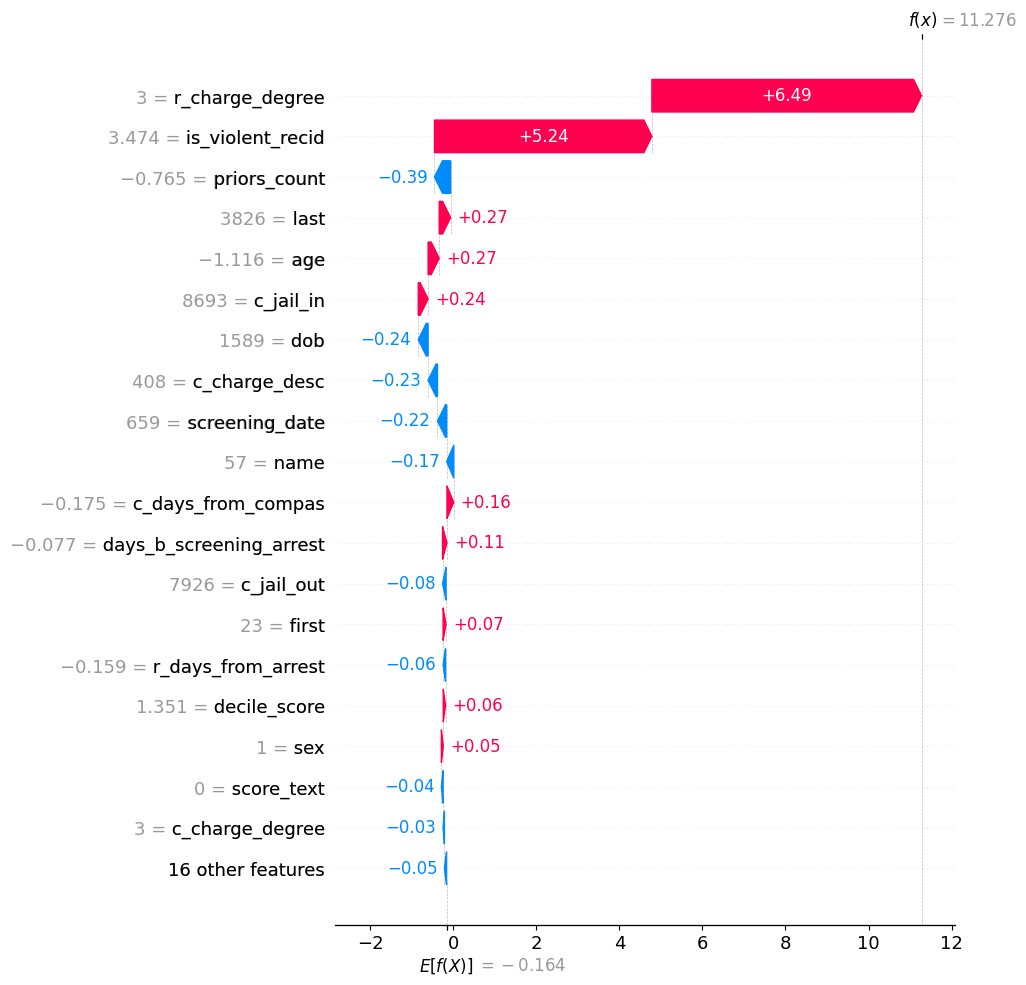

Waterfall plot para instancia 1758 de raza 0.0:


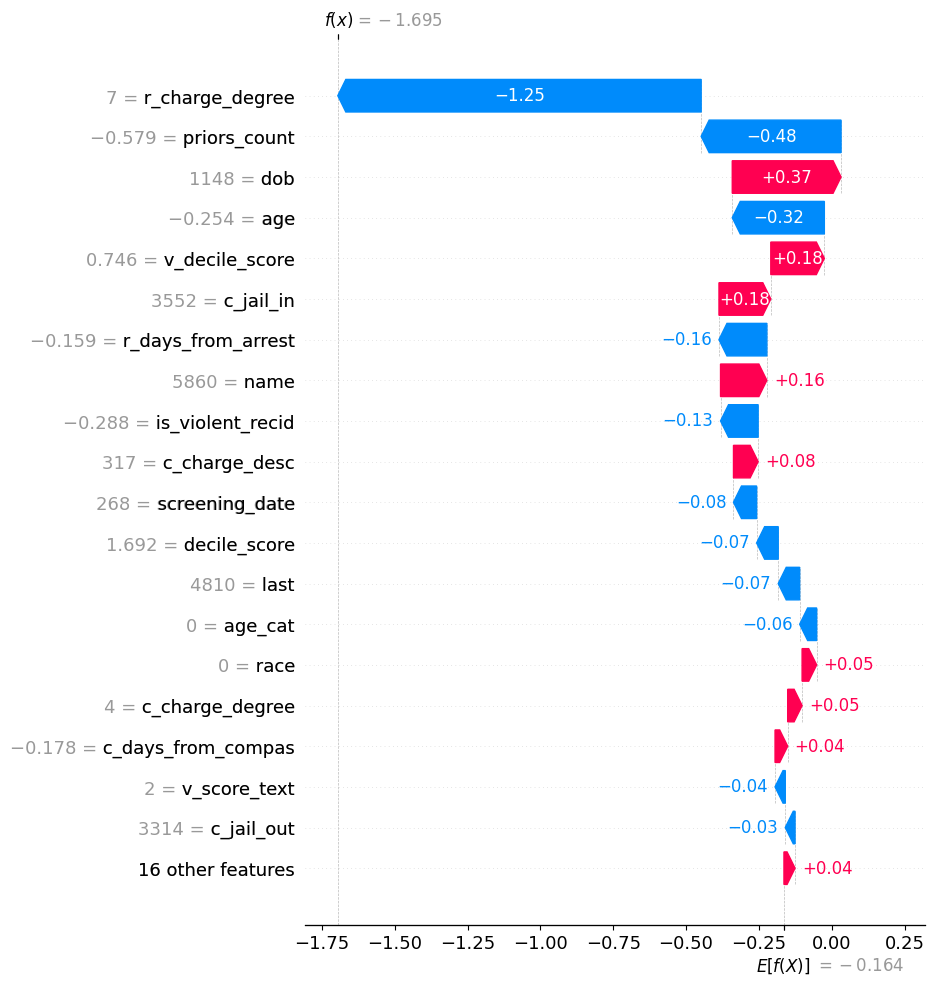

Waterfall plot para instancia 1446 de raza 3.0:


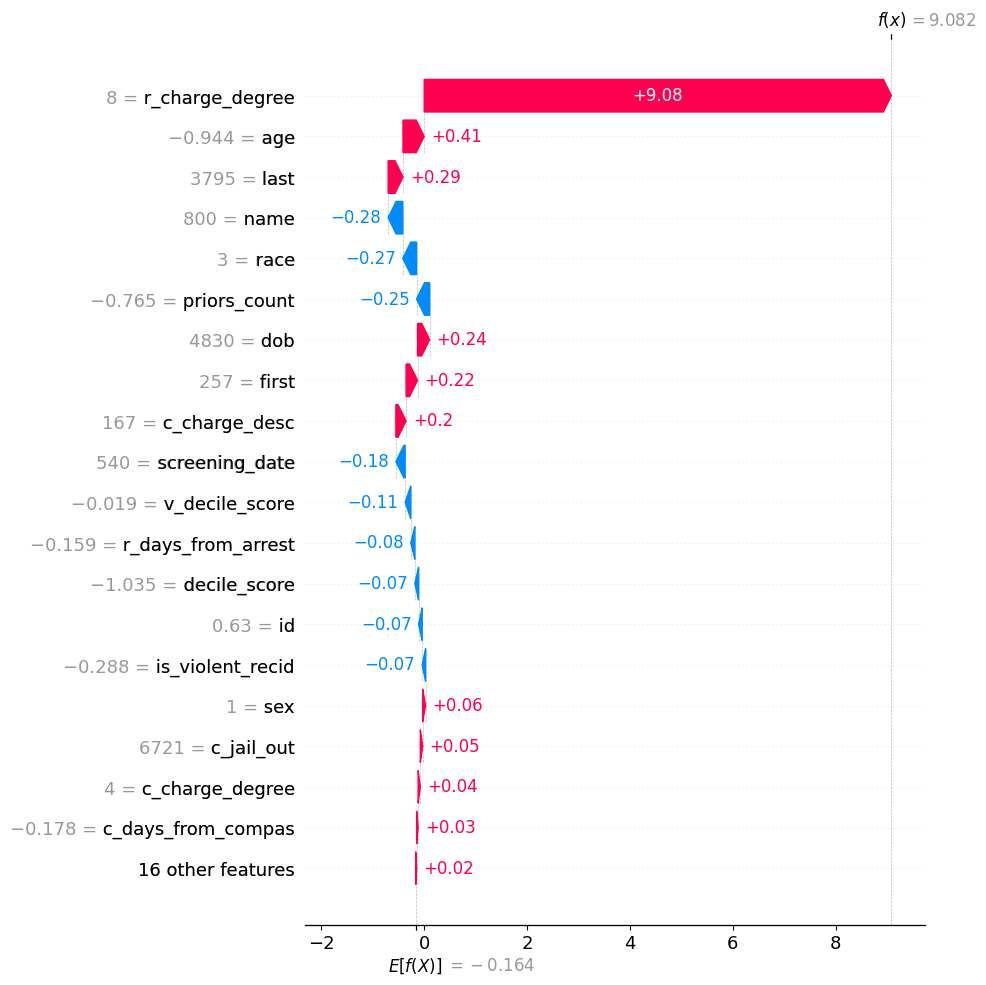

Waterfall plot para instancia 3582 de raza 5.0:


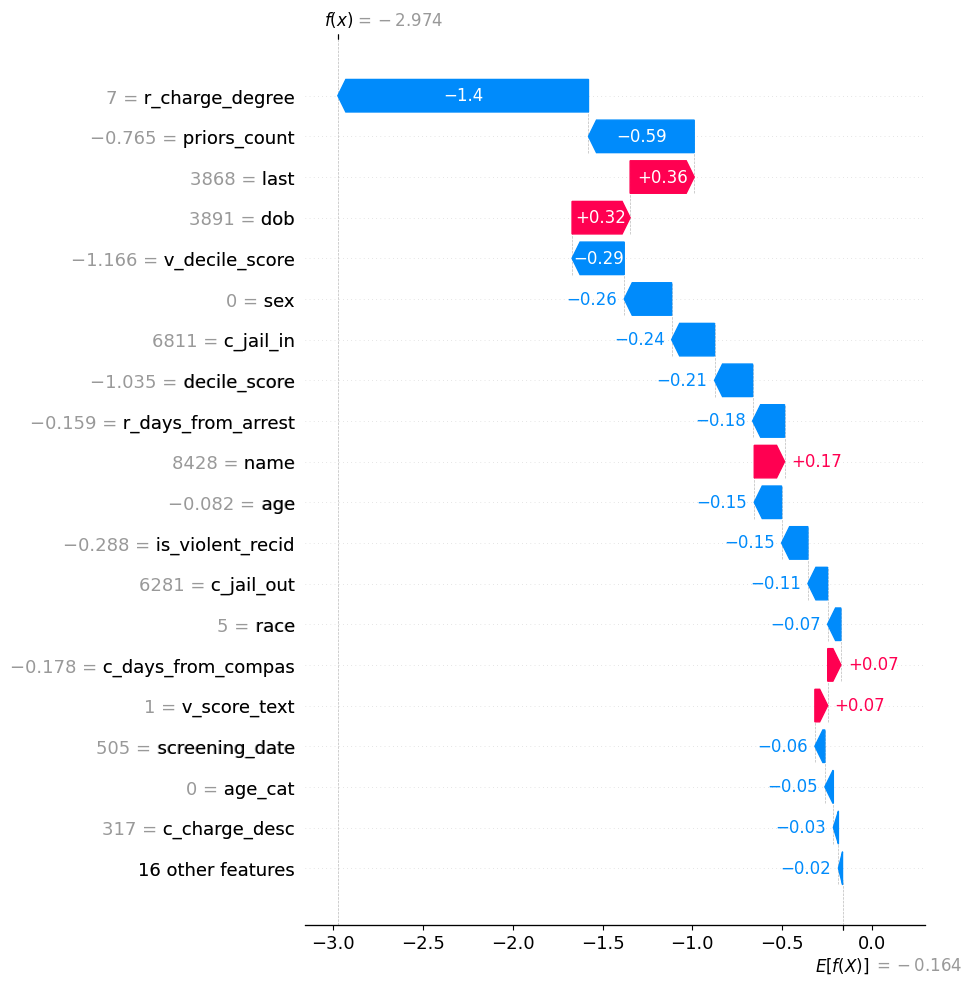

In [ ]:
import random

# Obtener las razas únicas en el conjunto de prueba
razas_unicas = X_test['race'].unique()
print("Razas únicas en el conjunto de prueba:", razas_unicas)

# Seleccionar cuatro índices aleatorios asegurando que cada uno pertenece a una raza distinta
indices_elegidos = []
razas_elegidas = set()
max_intentos = 1000  # Establecer un límite de intentos para evitar un bucle infinito
intentos = 0

while len(indices_elegidos) < 4 and intentos < max_intentos:
    idx = random.randint(0, shap_values.shape[0] - 1)
    raza = X_test.iloc[idx]['race']

    if raza not in razas_elegidas:
        indices_elegidos.append(idx)
        razas_elegidas.add(raza)

    intentos += 1

# Comprobar si se encontraron suficientes índices únicos
if len(indices_elegidos) < 4:
    print("No se encontraron suficientes instancias con razas distintas.")
else:
    # Calcular los valores SHAP para las instancias seleccionadas
    for idx in indices_elegidos:
        # Obtener los valores SHAP para la instancia seleccionada
        shap_values_instance = shap_values[idx]

        # Crear un objeto Explanation para la instancia seleccionada
        expl = shap.Explanation(values=shap_values_instance,
                                base_values=explainer.expected_value,
                                data=X_test.iloc[idx])

        # Generar el gráfico waterfall para la instancia seleccionada
        print(f"Waterfall plot para instancia {idx} de raza {X_test.iloc[idx]['race']}:")
        shap.plots.waterfall(expl, max_display=20)

# Conclusión

El presente trabajo ha alcanzado su objetivo de obtener una interpretación de las predicciones de un modelo empleando técnicas de explicabilidad, pero antes de lograr este propósito se ha seguido un exhaustivo proceso conformado por las siguientes etapas:

1. Se realizó la ingesta del dataset de estudio y se le aplicó un breve análisis exploratorio para recordar algunos aspectos necesarios para el proceso de limpieza.
2. Se eliminó cualquier tipo de dato que pudiese suponer un problema en el entrenamiento de modelos, desde valores nulos hasta valores atípicos, además de realizar la estandarización de variables numéricas y codificación de variables categóricas para dejar los datos en un estado en el que el modelo pudiese sacar el máximo provecho de los mismos para su entrenamiento.
3. El dataset se dividió en conjuntos de entrenamiento y prueba, asegurando que los modelos entrenados pudieran ser evaluados adecuadamente en datos no vistos, teniendo en cuenta la conservación de las proporciones de muestras en función de la raza.
4. Se empleó el algoritmo XGBoost para entrenar el modelo, seguido de la evaluación de su rendimiento utilizando métricas como precisión, F1-score, precisión, recall y la matriz de confusión.

Por último, tras finalizar el entrenamiento del modelo, llegó la hora de aplicar la técnica de explicabilidad SHAP, que permitió generar los shap values y utilizarlos en las gráficas summary y waterfall plot con el propósito de extraer toda la información posible de ellos.

A nivel personal, el desarrollo de este trabajo me ha permitido aprender más sobre cómo funcionan las técnicas de explicabilidad y como aplicarlas en mis desarrollos, permitiéndome alcanzar un mayor grado de comprensión y entendimiento de los modelos que pueda crear en el futuro.